# The old lighthouse keeper and the sea

In a Scottish pub you meet a retired lighthouse keeper who is telling about the lighthouse, situated at position $(x_0,y_0)$ miles of the coast (see ﬁgure) that he had been tending before retirement. The lighthouse is peculiar: instead of emitting a periodic signal in a given direction it emits short, focused light pulses randomly in every horizontal direction (or azimuth). No direction is preferred, and no correlation exists among the directions of the ﬂashes. Since you got curious you take a walk along the coast, and you record your location when observing a ﬂash. (see the recorded measurements in ﬁle _lighthouse.dat_) Now you want to infer the position of the lighthouse, given only the various positions of the light signal recordings. Since we want to restrict ourselves to a 1-parameter problem for this exercise, you can assume the $x_0$ coordinate of the lighthouse to be 1.25 miles.

* a: Translate the probability density distribution of the azimuth $θ$ of the ﬂashes into a probability density for observing a ﬂash at location $x$. Hint: Applying simple trigonometry, relate the angle to position along the coast. Note, that the question has nothing to do with Bayesian estimation as such, it is related to the method of exact transformation between samples drawn from different PDFs.

  Since all horizontal direction is equally possible, the PDF of $θ$ can be seen as a uniform distribution in the domain of $[0,2\pi)$, namely $θ$ ~ $U(0,2\pi)$ $\Rightarrow p(θ)=\chi_{[0,2\pi)}\frac{1}{2\pi}$
  
  ## Solution
  
  * $p(θ)=\chi_{[-\pi/2,\pi/2)}\frac{1}{\pi}$

  According to trigonometry we have $|x_0 - x|= y_0 \cdot \tan{θ} \Rightarrow \theta = \arctan{\frac{|x_0 - x|}{y_0}}$. Because of conservation of probability we get $p(x|y_0)=p(θ)\lvert{\frac{dθ}{dx}}\rvert=\chi_{[0,2\pi)}\frac{1}{2\pi y_0}\cdot \frac{1}{1+(\frac{|x_0 - x|}{y_0})^2}$ A Cauchy distribution
  
  ## Solution
  
   * $p(x|y_0)=p(θ)\lvert{\frac{dθ}{dx}}\rvert=\frac{1}{\pi y_0}\cdot \frac{1}{1+(\frac{|x_0 - x|}{y_0})^2}$
   
   * The likelihood $p(D=\{x_k\}|x_0, y_0)=\prod_k p(x_k|x_0, y_0)$


* b: Late during the very evening in the pub the lighthouse keeper tells stories of the early days when he in fact had to manually row out to the lighthouse which lies “at least 2miles off shore”. You interpret this statement as a distance of $(2.0±0.3)$ miles distributed like a Gaussian. What is the Bayesian estimate of $y_0$? Compare MAP, mean, and median of the posterior distribution! Compute also $σ_y$!

  The likelihood is then a Gaussian $N(2.0, 0.3^2)$: $\frac{1}{0.3\sqrt{2\pi}}e^{-\frac{(y_0-2.0)^2}{2\cdot0.3^2}}$
  
  We assume the prior is: $p(y_0|\{x_i\})\propto \prod_{x_i}p(x_i|y_0)$
  
  ## Solution
  
  * The prior is then a Gaussian $N(2.0, 0.3^2)$: $\frac{1}{0.3\sqrt{2\pi}}e^{-\frac{(y_0-2.0)^2}{2\cdot0.3^2}}$
  
  * $p(y)\propto$ constant
  
  * 1/y for positive y: $p(y)\propto 1/y$
  
  Thus the posterior is $P(y_0|\{x_k\})\propto \frac{1}{0.3\sqrt{2\pi}}e^{-\frac{(y_0-2.0)^2}{2\cdot0.3^2}}\prod_{x_i}\chi_{[0,2\pi)}\frac{1}{2\pi y_0}\cdot \frac{1}{1+(\frac{|x_0 - x_i|}{y_0})^2}$
  
  Calculate MAP: $\frac{\partial \ln{P(y_0|\{x_k\})}}{\partial y_0}=-\frac{(y_0-2.0)}{0.3^2}-..=0$ $\Rightarrow$
  
  Mean: $E(y_0|\{x_k\})=\int_{-\infty}^{\infty}{y_0 P(y_0|x)dy_0}=$


* c: Comparing the location of the maxima of the likelihood function and posterior, you start to wonder whether the lighthouse keeper did exaggerate the level of hardship of the early days. Redo the the previous estimate with largely uninformative priors ignoring the keeper’s stories: a constant prior and $∝ 1/y$ . What do you get for the MAP distances? What do you conclude?

_Hints on the numerical treatment_: since it is a 1D problem one can easily calculate the posterior a sufficiently ﬁne – for simplicity equidistant – grid. A range of y between zero (excluding zero as such) and 3 miles is enough. Then plot the posterior(s). This helps to see what is going on. 

_Optional add-ons for the tireless ones_: you may try and see what the quadratic approximation would give for $σ_y$. Moreover, you may try to solve the problem by sampling the posterior with a – guess what – Markov chain.

# Solution 

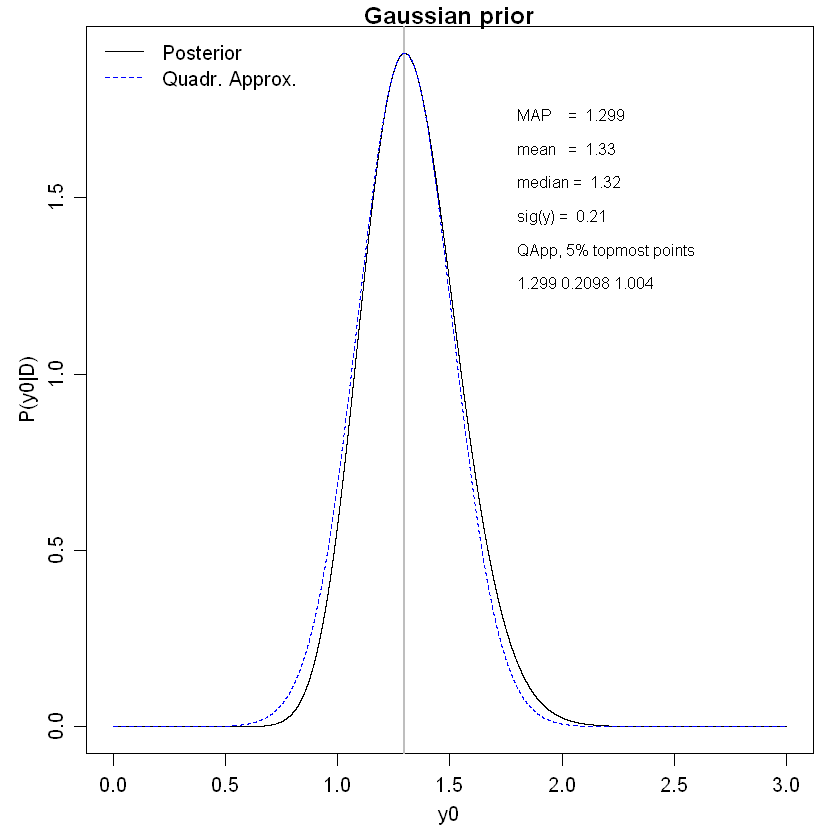

In [11]:
##### Infer posterior PDF of the position of lighthouse signal measurements

# Data can be found the corresponding file.
# Lighthouse position-related likelihood results from change of variables: theta-->x
# Lighthouse prior over theta is just uniform over the angle range: -1/pi<theta<1/pi

library(nnet) # for which.is.max

metro <- function(nmh,x0,step,prob,...) {

  #set.seed(12345)  # if reproducibility is required
  #step # factor in proposal

  x      <- vector(length=nmh)

  nAccept <- 0
  x[1]    <- x0
  i       <- 2
  # Programmed as while loop to be able to mimic errors
  # made by students. A for-loop is more adequate here. 
  while (i <=nmh) {
    xcur  <- x[i-1]
    xprop <- xcur + runif(1,-1.0,1.0)*step
    # ln Metropolis ratio
    lnMR <- log(prob(xprop,...)/prob(xcur,...))
    if( lnMR >=0 || lnMR > log(runif(1,min=0,max=1))) {
      nAccept <- nAccept + 1
      x[i]    <- xprop
      i <- i+1
    } else {
#      Comment out next two lines for mimicking no insert of rejected points
       x[i] <- xcur
       i <- i+1
    }
  }
  cat("metro: naccepted = ", nAccept, "\n")
  return(list(chain=x, naccepted=nAccept))
}

post <- function(y_temp,xdat) {
  if(y_temp < 0) {return(-Inf)} # the effect of the prior
  prod(y_temp/((xdat-xtrue)^2+y_temp^2))*prior1(y_temp)
}

prior1 <- function(y) {
  yguess <- 2.0*unit
  ysigma <- 0.3*unit
  return(exp(-0.5 *((y-yguess)/ysigma)^2))
}

prior2 <- function(y) return(1)
prior3 <- function(y) return(1/y)

medianLH <- function(y,delta_y,p_y) {
  return(y[which.is.max(-(cumsum(p_y)*delta_y-0.5)^2)])
}

fitGauss <- function(x,y,mu0,sig0,scale0){
  f = function(p){
    d = p[3]*dnorm(x,mean=p[1],sd=p[2])
    sum((d-y)^2)
  }
  return(optim(c(mu0,sig0,scale0),f))
}


unit <- 1.0 # is the result scale invariant?

# read Data
xdat <- as.matrix(read.table("lighthouse.dat")) * unit

# set model parameters
xtrue=1.25*unit

# Define sampling grid to compute posterior (will be normalized
# over this range too)
delta_y <- 0.0001*unit
ylim    <- c(0.0001, 3.0)*unit
y=seq(from=ylim[1], to=ylim[2], by=delta_y)
p_y <- seq(from=ylim[1], to=ylim[2], by=delta_y)

for(j in 1:length(y)) {
	p_y[j] <- post(y[j],xdat)
}

p_y <- p_y/(delta_y*sum(p_y))


mean_y   <- delta_y * sum(p_y * y)
map_y    <- y[p_y==max(p_y)]
median_y <- medianLH(y,delta_y,p_y) 
sd_y     <- sqrt( delta_y * sum((y-mean_y)^2 * p_y) )
cut      <- p_y > 0.95*max(p_y)
quadra   <- fitGauss(y[cut],p_y[cut],map_y,sd_y,1.0*unit)


# plot
x0 <- map_y + 0.5
y0 <- max(p_y)
par(mfrow=c(1,1), mgp=c(2.0,0.8,0), mar=c(3.5,3.5,1,1), oma=0.1*c(1,1,1,1))
plot(y, p_y, xlab="y0", ylab="P(y0|D)",type="l",xlim=c(0,max(y)), main="Gaussian prior")
text(x0, 0.9*y0,  paste("MAP    = ",round(map_y,digits=3)),cex=0.8,adj = c(0,0))
text(x0, 0.85*y0, paste("mean   = ",round(mean_y,digits=3)),cex=0.8,adj = c(0,0))
text(x0, 0.80*y0, paste("median = ",round(median_y,digits=3)),cex=0.8,adj = c(0,0))
text(x0, 0.75*y0, paste("sig(y) = ",round(sd_y,digits=3)),cex=0.8,adj = c(0,0))
text(x0, 0.70*y0, paste("QApp, 5% topmost points"),cex=0.8,adj = c(0,0))
text(x0, 0.65*y0, paste(round(quadra$par[1],digits=3),
                        round(quadra$par[2],digits=4),
                        round(quadra$par[3],digits=3))
                        ,cex=0.8,adj = c(0,0))
abline(v=map_y, col="grey",lwd=2)
lines(y, quadra$par[3]*dnorm(y, mean=quadra$par[1], sd=quadra$par[2]),lty=2,col="blue")

legend("topleft", c("Posterior","Quadr. Approx."), lty = c(1,2),col=c("black", "blue"),bty="n")



# mean sum(y*p_y)/sum(p_y)
# xx <- metro(100000,1.0,0.3,xdat)
# tail(xx$chain, -100000)